- 단어를 고차원 벡터로 표현하는 기술
# Glove
- Global Vectors for Word Representation
- 단어 간의 의미적 유사도 측정(Semantic Similarity)
- 벡터 공간에서 단어관계 분석
```
king - man + woman ~= queen
```

_Gensim_ 은 텍스트 관련 문제를 해결하기 위한 강력한 도구로, 주로 주제 모델링과 문서 유사성 분석에 사용된다.

In [1]:
# 라이브러리 gensim
# 사전학습 모델 로드 Glove wiki gigaword-50
# 단어벡터 추출 및 기본 정보 확인
# 단어 간 유사도 계산
# 벡터 연산을 통한 의미관계 분석
# 문장 수준의 유사도 분석

In [3]:
'''
Gensim을 사용하여 Word2Vec 모델을 훈련하기
'''
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Word2Vec 모델 훈련
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

# 단어 벡터 얻기
word_vectors = model.wv

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 4차원 임베딩 공간
word_vectors = {
    "king": np.array([0.9, 0.1, 0.2, 0.8]),
    "queen": np.array([0.8, 0.2, 0.3, 0.7]),
    "man": np.array([0.5, 0.8, 0.1, 0.3]),
    "woman": np.array([0.4, 0.9, 0.2, 0.2]),
}

# 각 차원이 의미있는 특성으로 인코딩
for word, vec in word_vectors.items():
  print(f'{word:8} -> {vec}')
# 의미적으로 가까운 단어들은 벡터도 가깝다.

king     -> [0.9 0.1 0.2 0.8]
queen    -> [0.8 0.2 0.3 0.7]
man      -> [0.5 0.8 0.1 0.3]
woman    -> [0.4 0.9 0.2 0.2]


In [8]:
# GloVe 원리 이해: 공기 행렬과 임베딩 학습
import numpy as np

# 간단한 코퍼스: "king is man" "queen is woman"
# 공기 행렬 (윈도우 크기 2)
cooccurrence_matrix = np.array([
    # king queen man woman is
    [0,   2,    1,   0,   2],  # king
    [2,   0,    0,   1,   2],  # queen
    [1,   0,    0,   2,   1],  # man
    [0,   1,    2,   0,   1],  # woman
    [2,   2,    1,   1,   0],  # is
], dtype=float)

words = ["king", "queen", "man", "woman", "is"]

print("=" * 60)
print("단어 행렬 (Co-occurrence Matrix)")
print("=" * 60)
print("       " + "  ".join(f"{w:6}" for w in words))
for i, word in enumerate(words):
    row_str = "  ".join(f"{int(cooccurrence_matrix[i][j]):6}" for j in range(len(words)))
    print(f"{word:6} {row_str}")

print("\n의미:")
print("- king과 queen이 자주 함께 나타남 (2회)")
print("- man과 woman도 자주 함께 나타남 (2회)")
print("- 모든 단어가 'is'와 함께 나타남")

단어 행렬 (Co-occurrence Matrix)
       king    queen   man     woman   is    
king        0       2       1       0       2
queen       2       0       0       1       2
man         1       0       0       2       1
woman       0       1       2       0       1
is          2       2       1       1       0

의미:
- king과 queen이 자주 함께 나타남 (2회)
- man과 woman도 자주 함께 나타남 (2회)
- 모든 단어가 'is'와 함께 나타남


# 🧠 Count-based vs Word2Vec vs GloVe 비교 정리

---

## 🔹 1. Count-based (기존 방식)

**핵심 아이디어:**  
단어의 **등장 빈도**나 **동시 등장(co-occurrence)** 정보를 이용해 벡터화하는 방식.

### ✅ 대표 방법
- **BoW (Bag of Words)**  
  문서 내 단어 출현 횟수만 세는 단순한 방식   
  문맥이나 순서 정보는 반영되지 않음  
```
"나는 밥을 먹었다", "나는 국을 먹었다"
→ {'나는': 2, '밥': 1, '국': 1, '먹었다': 2}
```


- **TF-IDF (Term Frequency – Inverse Document Frequency)**  
단어의 출현 빈도(TF)에 전체 문서에서의 희귀도(IDF)를 고려해 중요도를 계산.  
공통적인 단어(the, is 등)의 영향력을 줄임.

### ⚠️ 한계점
- 문장 구조 및 단어 순서 반영 불가  
- 차원이 매우 크고 희소함 (Sparse Vector)  
- 단어 간 의미적 유사도 표현 어려움  

---

## 🔹 2. Word2Vec

**핵심 아이디어:**  
> “단어의 의미는 문맥으로 정의된다 (You shall know a word by the company it keeps).”  
단어를 **실수 벡터(Embedding)** 로 학습하여 의미적으로 유사한 단어를 가까이 위치시킴.

### ✅ 모델 구조
| 모델 | 설명 |
|------|------|
| **CBOW (Continuous Bag of Words)** | 주변 단어 → 중심 단어 예측 |
| **Skip-gram** | 중심 단어 → 주변 단어 예측 (희귀 단어 학습에 유리) |

### ⚙️ 특징
- 신경망 기반의 **예측 모델(Predictive Model)**  
- 결과는 **조밀(Dense) 벡터**  
- 단어 간 의미적 관계를 수학적으로 표현 가능  
```
벡터("왕") - 벡터("남자") + 벡터("여자") ≈ 벡터("여왕")
```

---

## 🔹 3. GloVe (Global Vectors for Word Representation)

**핵심 아이디어:**  
**Count-based + Word2Vec** 의 장점을 결합.  
전역 통계(Global Co-occurrence) 정보를 활용하면서도 Word2Vec처럼 의미 공간을 학습함.

### ✅ 작동 원리
- 단어-단어 **동시 등장 행렬(co-occurrence matrix)** 기반  
- 두 단어가 함께 등장할 확률을 이용해 의미적 유사도를 학습  
- Word2Vec보다 **전역적 문맥 정보(Global context)** 반영

---

## 🔹 4. 비교 요약

| 구분 | Count-based (BoW/TF-IDF) | Word2Vec | GloVe |
|------|---------------------------|-----------|--------|
| **방식** | 통계 기반 | 예측 기반 | 통계 + 예측 혼합 |
| **기반 정보** | 단어 출현 횟수 | 문맥(주변 단어) | 단어 동시 등장 확률 |
| **벡터 형태** | 희소(Sparse) | 조밀(Dense) | 조밀(Dense) |
| **문맥 반영** | ❌ | ✅ (지역적) | ✅ (전역적) |
| **대표 학습 방식** | BoW, TF-IDF | CBOW, Skip-gram | Co-occurrence Matrix |

---

## 🔹 5. 관계 구조
```
[Count-based] ──(통계 기반)────┐
├──> [GloVe] (통계 + 예측 혼합)
[Word2Vec] ─────(예측 기반)───┘
```

# Glove 실습
- 단어를 _의미를 가진 벡터_ 로 변환하는 알고리즘


In [9]:

import gensim.downloader as api
import numpy as np
# Glove모델 (50차원)
wv = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [11]:
test_word = 'king'
vec = wv[test_word]
print(f'단어: {test_word}')
print(f'벡터 차원: {len(vec)}')
print(f'벡터(앞에서 10개 값): {vec[:10]}')
print(f'벡터 타입: {type(vec)}')
print(f'벡터 범위: {vec.min():.4f}  {vec.max():.4f}')

단어: king
벡터 차원: 50
벡터(앞에서 10개 값): [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]
벡터 타입: <class 'numpy.ndarray'>
벡터 범위: -2.2230  1.9927


In [15]:
# 모델정보
print(f'학습된 단어 개수: {len(wv)}')
print(f'임베딩 차원: {wv.vector_size}')
print(f'모델의 종류: {type(wv)}')

학습된 단어 개수: 400000
임베딩 차원: 50
모델의 종류: <class 'gensim.models.keyedvectors.KeyedVectors'>


In [17]:
# 유사한 단어 찾기
print(f'{test_word}와 유사한 상위 5개 단어')

similar_words = wv.most_similar(test_word, topn=5)
similar_words

king와 유사한 상위 5개 단어


[('prince', 0.8236179351806641),
 ('queen', 0.7839043140411377),
 ('ii', 0.7746230363845825),
 ('emperor', 0.7736247777938843),
 ('son', 0.766719400882721)]

In [18]:
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
v1*v2, np.dot(v1,v2)

(array([ 4, 10, 18]), np.int64(32))


 벡터 쌍 간의 코사인 유사도:
king         vs queen       :  0.9923
king         vs man         :  0.7894
king         vs unrelated   : -0.1961
queen        vs man         :  0.7071
queen        vs unrelated   : -0.3162
man          vs unrelated   :  0.4472


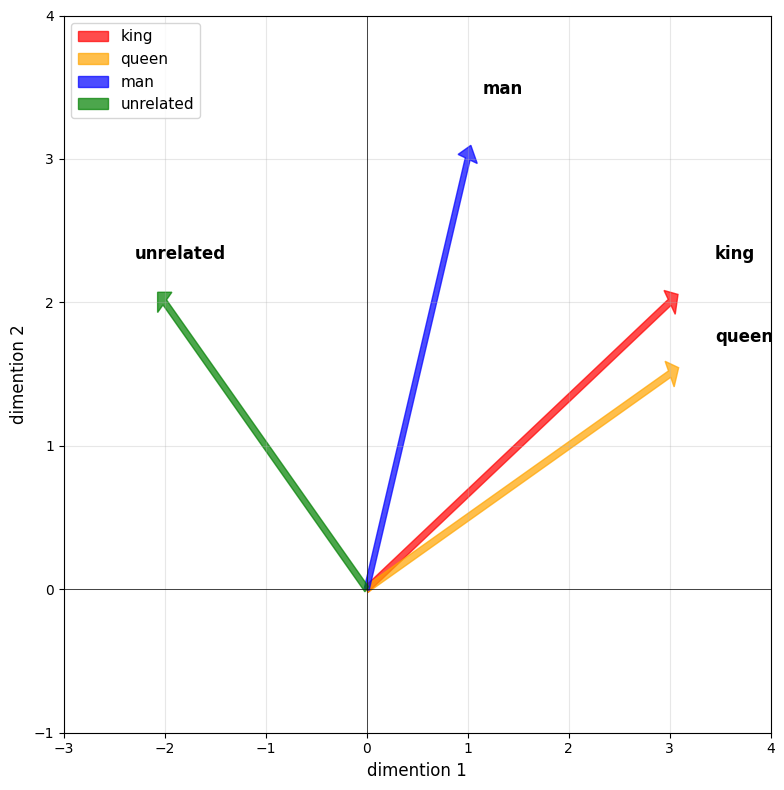


 관찰:
- king과 queen: 유사한 방향 → 높은 유사도
- king과 unrelated: 거의 수직 → 낮은 유사도


In [19]:
import numpy as np
import matplotlib.pyplot as plt
def cosine_similarity(v1, v2):
    """코사인 유사도 계산"""
    dot_product = np.dot(v1, v2)
    norm1 = np.linalg.norm(v1)  # 벡터의 크기(길이, norm) 계산
    norm2 = np.linalg.norm(v2)
    return dot_product / (norm1 * norm2)

vectors = {
    "king": np.array([3.0, 2.0]),      # 상단 우측
    "queen": np.array([3.0, 1.5]),     # king과 유사한 방향
    "man": np.array([1.0, 3.0]),       # 다른 방향
    "unrelated": np.array([-2.0, 2.0]), # 거의 수직
}
# 모든쌍의 코사인 유사도 계산
print("\n 벡터 쌍 간의 코사인 유사도:")
words_list = list(vectors.keys())
for i, w1 in enumerate(words_list):
    for w2 in words_list[i+1:]:
        sim = cosine_similarity(vectors[w1], vectors[w2])
        print(f"{w1:12} vs {w2:12}: {sim:7.4f}")

# 시각화
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['red', 'orange', 'blue', 'green']
for (word, vec), color in zip(vectors.items(), colors):
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.2, head_length=0.1,
             fc=color, ec=color, alpha=0.7, label=word, width=0.05)
    ax.text(vec[0]*1.15, vec[1]*1.15, word, fontsize=12, fontweight='bold')

ax.set_xlim(-3, 4)
ax.set_ylim(-1, 4)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.grid(True, alpha=0.3)
ax.set_xlabel('dimention 1', fontsize=12)
ax.set_ylabel('dimention 2', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

print("\n 관찰:")
print("- king과 queen: 유사한 방향 → 높은 유사도")
print("- king과 unrelated: 거의 수직 → 낮은 유사도")